<a href="https://colab.research.google.com/github/BrainConnection/Schroedinger-Practice/blob/main/Harmonic_Oscillator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install numpy
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


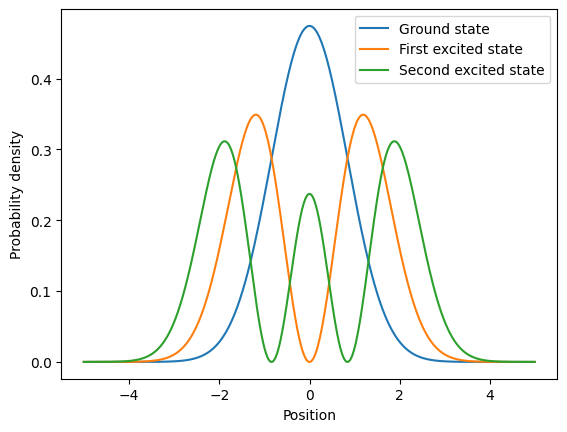

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
hbar = 1  # reduced Planck constant
m = 1     # mass of the particle
omega = 1 # angular frequency of the harmonic oscillator

# Define the potential function
def V(x):
    return 0.5 * m * omega**2 * x**2

# Define the wave function solver
def solve_schrodinger(x, psi_0):
    # Set up the grid
    dx = x[1] - x[0]
    N = len(x)

    # Set up the Hamiltonian matrix
    H = np.zeros((N, N))
    for i in range(N):
        H[i,i] = 2 / m / dx**2 + V(x[i])
        if i > 0:
            H[i,i-1] = -1 / m / dx**2
            H[i-1,i] = -1 / m / dx**2

    # Diagonalize the Hamiltonian matrix
    E, psi = np.linalg.eigh(H)

    # Normalize the wave functions
    psi /= np.sqrt(dx)

    # Return the wave functions
    return psi

# Set up the grid
x_min = -5
x_max = 5
dx = 0.01
x = np.arange(x_min, x_max, dx)

# Solve the Schrödinger equation
psi = solve_schrodinger(x, None)

# Plot the wave function
plt.plot(x, psi[:,0]**2, label='Ground state')
plt.plot(x, psi[:,1]**2, label='First excited state')
plt.plot(x, psi[:,2]**2, label='Second excited state')
plt.xlabel('Position')
plt.ylabel('Probability density')
plt.legend()
plt.show()
